import matplotlib.pyplot as plt


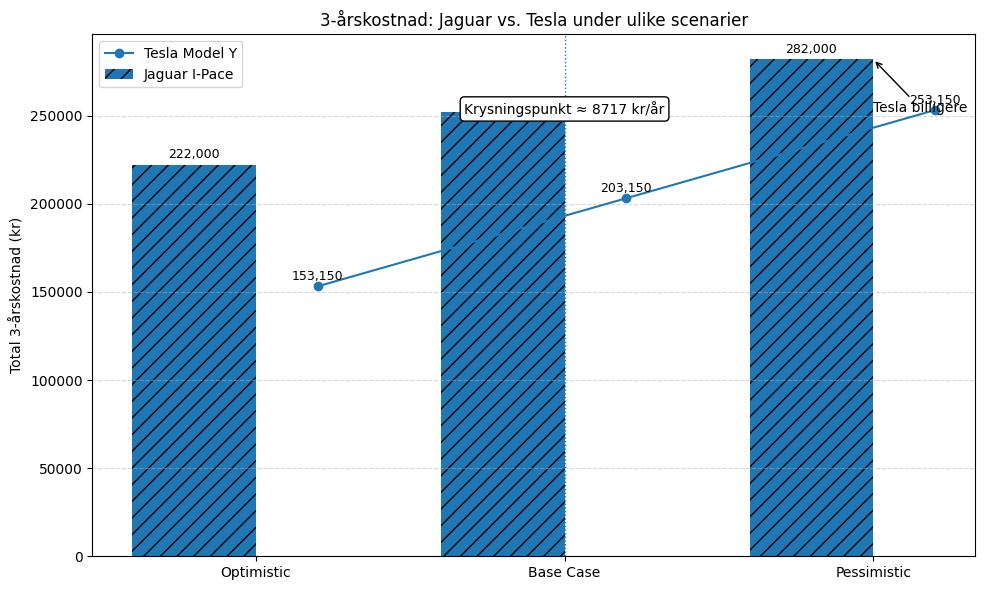

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# --- Scenarier ---
scenarios = ['Optimistic', 'Base Case', 'Pessimistic']

# --- Jaguar faste kostnader ---
jaguar_depreciation = 100_000
jaguar_interest     =  33_000
jaguar_insurance    =  12_000 * 3
jaguar_charging     =   8_000
jaguar_fixed = (
    jaguar_depreciation
  + jaguar_interest
  + jaguar_insurance
  + jaguar_charging
)

# Årlige reparasjonskostnader per scenario
jaguar_repairs = {
    'Optimistic': 15_000,
    'Base Case':  25_000,
    'Pessimistic':35_000
}
jaguar_totals = [
    jaguar_fixed + 3 * jaguar_repairs[sc]
    for sc in scenarios
]

# --- Tesla faste kostnader ---
tesla_insurance = 10_000 * 3
tesla_charging  =  6_000
tesla_fee       =  2_150
tesla_fixed     = (
    tesla_insurance
  + tesla_charging
  + tesla_fee
)

# Depresiering per scenario
tesla_depreciation = {
    'Optimistic':100_000,
    'Base Case': 150_000,
    'Pessimistic':200_000
}
tesla_repairs = 15_000  # konstant antakelse
tesla_totals = [
    tesla_fixed + tesla_depreciation[sc] + tesla_repairs
    for sc in scenarios
]

# --- Krysningspunkt for Base Case ---
cross_R = (tesla_totals[1] - jaguar_fixed) / 3

# --- Plotting ---
x = np.arange(len(scenarios))
width = 0.4

fig, ax = plt.subplots(figsize=(10,6))

# Jaguar som hatted bars
bars = ax.bar(
    x - width/2, jaguar_totals, width,
    label='Jaguar I-Pace', hatch='//'
)

# Tesla som line + marker
ax.plot(
    x + width/2, tesla_totals,
    marker='o', linestyle='-',
    label='Tesla Model Y'
)

# Annoter verdier
for idx, val in enumerate(jaguar_totals):
    ax.text(idx - width/2, val + 2000, f"{val:,}",
            ha='center', va='bottom', fontsize=9)
for idx, val in enumerate(tesla_totals):
    ax.text(idx + width/2, val + 2000, f"{val:,}",
            ha='center', va='bottom', fontsize=9)

# Dynamiske call-outs
if jaguar_totals[0] < tesla_totals[0]:
    ax.annotate(
        'Jaguar billigere', xy=(0, jaguar_totals[0]),
        xytext=(0, jaguar_totals[0]+30000),
        arrowprops=dict(arrowstyle='->')
    )
if jaguar_totals[2] > tesla_totals[2]:
    ax.annotate(
        'Tesla billigere', xy=(2, jaguar_totals[2]),
        xytext=(2, jaguar_totals[2]-30000),
        arrowprops=dict(arrowstyle='->')
    )

# Krysningspunkt i Base Case
ax.axvline(x=1, linestyle=':', linewidth=1)
ax.text(
    1, max(jaguar_totals+tesla_totals)*0.9,
    f"Krysningspunkt ≈ {cross_R:.0f} kr/år",
    ha='center', va='center',
    bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor='black')
)

ax.set_xticks(x)
ax.set_xticklabels(scenarios)
ax.set_ylabel("Total 3-årskostnad (kr)")
ax.set_title("3-årskostnad: Jaguar vs. Tesla under ulike scenarier")
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


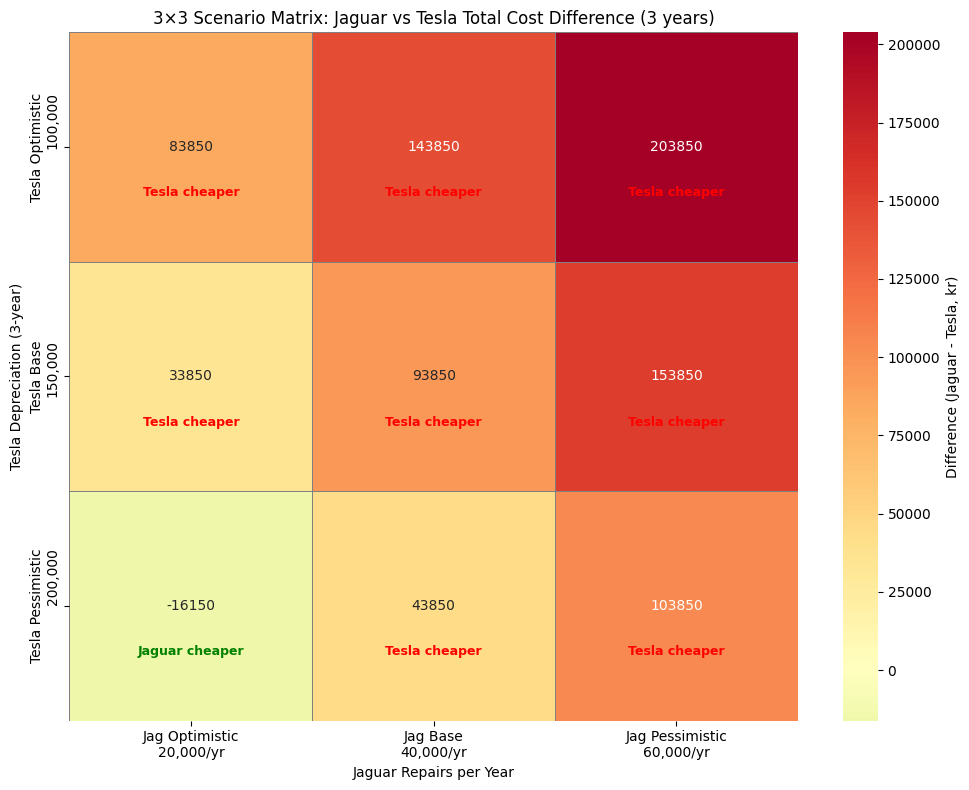

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scenario labels
scenarios = ['Optimistic', 'Base', 'Pessimistic']

# Jaguar constants
jaguar_fixed = 100_000 + 33_000 + 36_000 + 8_000

jaguar_repairs = {
    'Optimistic': 20_000,
    'Base': 40_000,
    'Pessimistic': 60_000
}

# Tesla constants
tesla_fixed = 30_000 + 6_000 + 2_150 + 15_000

tesla_depreciation = {
    'Optimistic': 100_000,
    'Base': 150_000,
    'Pessimistic': 200_000
}

# Initialize 3x3 grid (Tesla depreciation vs Jaguar repairs)
matrix = np.zeros((3,3))

# Populate matrix
for i, tesla_dep_key in enumerate(scenarios):
    tesla_total = tesla_fixed + tesla_depreciation[tesla_dep_key]
    
    for j, jag_rep_key in enumerate(scenarios):
        jaguar_total = jaguar_fixed + 3 * jaguar_repairs[jag_rep_key]
        
        diff = jaguar_total - tesla_total
        matrix[i, j] = diff  # Positive: Tesla cheaper, Negative: Jaguar cheaper

# Plot heatmap
fig, ax = plt.subplots(figsize=(10,8))

sns.heatmap(
    matrix, annot=True, fmt=".0f", cmap='RdYlGn_r', center=0,
    xticklabels=[f"Jag {sc}\n{jaguar_repairs[sc]:,}/yr" for sc in scenarios],
    yticklabels=[f"Tesla {sc}\n{tesla_depreciation[sc]:,}" for sc in scenarios],
    cbar_kws={'label': 'Difference (Jaguar - Tesla, kr)'},
    linewidths=0.5, linecolor='gray'
)

# Set labels and titles
ax.set_xlabel("Jaguar Repairs per Year")
ax.set_ylabel("Tesla Depreciation (3-year)")
ax.set_title("3×3 Scenario Matrix: Jaguar vs Tesla Total Cost Difference (3 years)")

# Add annotations to clarify meaning
for i in range(len(scenarios)):
    for j in range(len(scenarios)):
        diff = matrix[i, j]
        text = "Jaguar cheaper" if diff < 0 else "Tesla cheaper"
        color = "green" if diff < 0 else "red"
        ax.text(j+0.5, i+0.7, text, ha='center', va='center', color=color, fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()


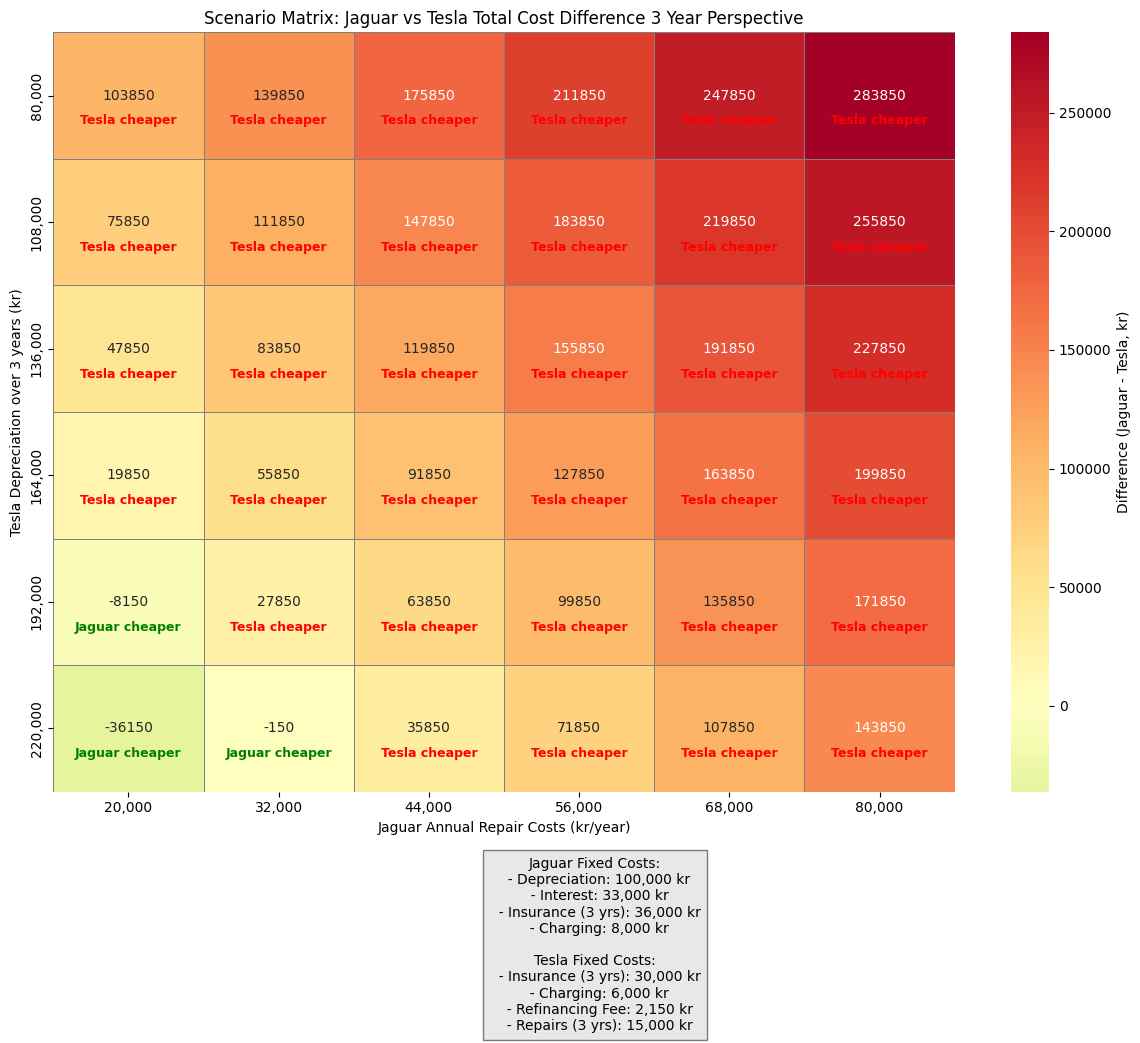

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Adjustable input parameters
jaguar_repair_cost_range = (20_000, 80_000)   # Lower and upper limits for Jaguar annual repair costs
tesla_depreciation_range = (80_000, 220_000)  # Lower and upper limits for Tesla 3-year depreciation
granularity = 6  # Number of intervals

# Constants (fixed assumptions)
jaguar_fixed = 100_000 + 33_000 + 36_000 + 8_000  # Depreciation + Interest + Insurance + Charging
tesla_fixed = 30_000 + 6_000 + 2_150 + 15_000     # Insurance + Charging + Refinancing Fee + Repairs

# Generate ranges based on granularity
jag_repairs = np.linspace(jaguar_repair_cost_range[0], jaguar_repair_cost_range[1], granularity)
tesla_depreciations = np.linspace(tesla_depreciation_range[0], tesla_depreciation_range[1], granularity)

# Calculate matrix
matrix = np.zeros((granularity, granularity))
for i, tesla_dep in enumerate(tesla_depreciations):
    tesla_total = tesla_fixed + tesla_dep
    for j, jag_rep in enumerate(jag_repairs):
        jaguar_total = jaguar_fixed + 3 * jag_rep
        matrix[i, j] = jaguar_total - tesla_total

# Plot heatmap
fig, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(
    matrix, annot=True, fmt=".0f", cmap='RdYlGn_r', center=0,
    xticklabels=[f"{int(j):,}" for j in jag_repairs],
    yticklabels=[f"{int(t):,}" for t in tesla_depreciations],
    cbar_kws={'label': 'Difference (Jaguar - Tesla, kr)'},
    linewidths=0.5, linecolor='gray', ax=ax
)

ax.set_xlabel("Jaguar Annual Repair Costs (kr/year)")
ax.set_ylabel("Tesla Depreciation over 3 years (kr)")
ax.set_title("Scenario Matrix: Jaguar vs Tesla Total Cost Difference 3 Year Perspective")

# Add annotations to clarify meaning
for i in range(granularity):
    for j in range(granularity):
        diff = matrix[i, j]
        text = "Jaguar cheaper" if diff < 0 else "Tesla cheaper"
        color = "green" if diff < 0 else "red"
        ax.text(j + 0.5, i + 0.7, text, ha='center', va='center', color=color, fontsize=9, fontweight='bold')

# Fixed assumptions summary
assumptions = (
    f"Jaguar Fixed Costs:\n"
    f"  - Depreciation: 100,000 kr\n"
    f"  - Interest: 33,000 kr\n"
    f"  - Insurance (3 yrs): 36,000 kr\n"
    f"  - Charging: 8,000 kr\n\n"
    f"Tesla Fixed Costs:\n"
    f"  - Insurance (3 yrs): 30,000 kr\n"
    f"  - Charging: 6,000 kr\n"
    f"  - Refinancing Fee: 2,150 kr\n"
    f"  - Repairs (3 yrs): 15,000 kr"
)

plt.figtext(0.5, -0.15, assumptions, ha="center", fontsize=10, bbox={"facecolor":"lightgrey", "alpha":0.5, "pad":5})
plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()
